<a href="https://colab.research.google.com/github/reachanihere/ASL-Recognition/blob/master/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
xls = pd.ExcelFile('/content/gdrive/My Drive/COVID-19-Probability-Prediction/Train_dataset.xlsx')
data_train = pd.read_excel(xls, 'Train_dataset')
data_test = pd.read_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/Test_dataset.xlsx')

In [102]:
data_train.head()

people_ID        Region  Gender  ...   salary FT/month Infect_Prob
0          1  Bhubaneshwar  Female  ...  1300000      2.0   49.135010
1          2  Bhubaneshwar  Female  ...   400000      1.0   51.147880
2          3  Bhubaneshwar  Female  ...   900000      1.0   73.224000
3          4  Bhubaneshwar  Female  ...  2300000      1.0   48.779225
4          5  Bhubaneshwar  Female  ...  1100000      1.0   87.868800

[5 rows x 28 columns]

In [103]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [104]:
data_train.describe()

people_ID      Children  ...     FT/month   Infect_Prob
count  10714.000000  10403.000000  ...  9991.000000  10714.000000
mean   10084.893784      1.062770  ...     1.004604     52.280680
std     7108.663645      0.818222  ...     0.815257     10.674667
min        1.000000      0.000000  ...     0.000000     29.289600
25%     2679.250000      0.000000  ...     0.000000     47.277426
50%    10003.500000      1.000000  ...     1.000000     49.008389
75%    15141.750000      2.000000  ...     2.000000     52.762313
max    22695.000000      2.000000  ...     2.000000     97.632000

[8 rows x 18 columns]

In [105]:
data_train.shape

(10714, 28)

In [0]:
data_train = data_train.replace('None',0)
data_train = data_train.replace('NaN',0)

In [0]:
data_train = data_train.fillna(0)

In [108]:
data_train['comorbidity'].unique()

array(['Hypertension', 'Diabetes', 0, 'Coronary Heart Disease'],
      dtype=object)

In [109]:
data_train['Pulmonary score'].unique()

array(['<400', '<100', '<300', '<200'], dtype=object)

In [110]:
len(data_train['Infect_Prob'].unique())

8724

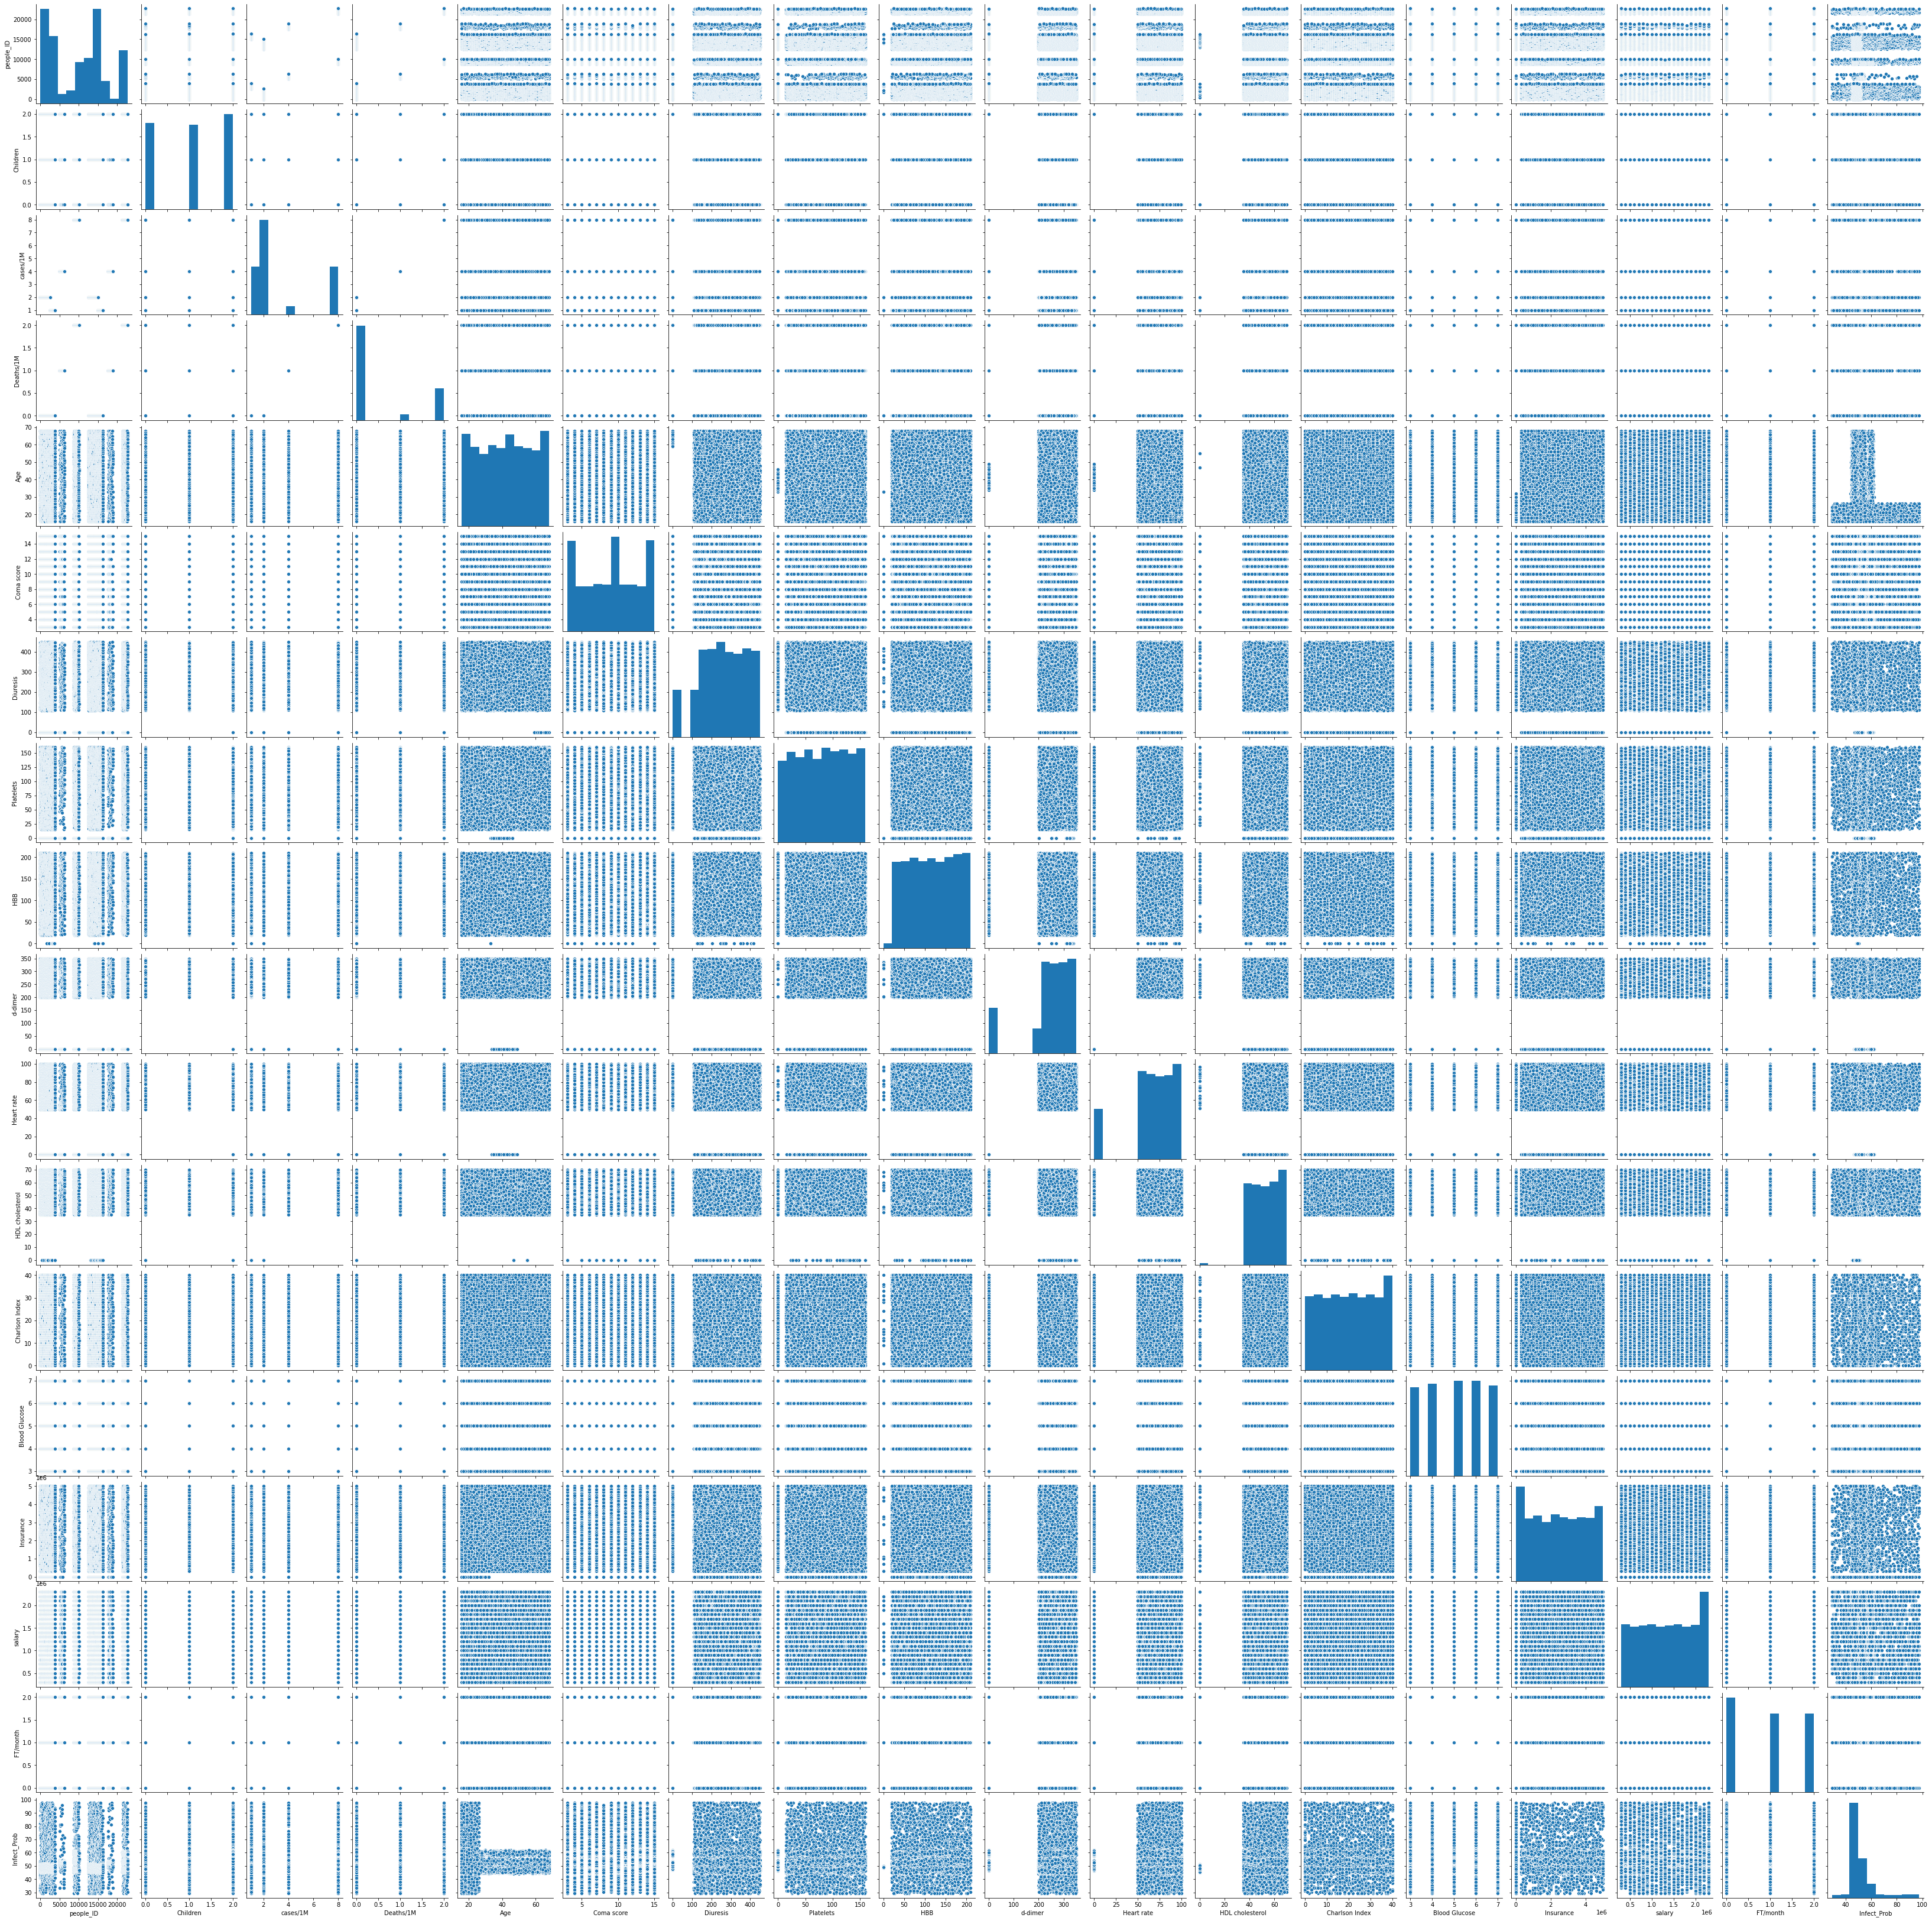

In [111]:
sns.pairplot(data_train)

In [112]:
df = data_train.copy()
df.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [0]:
df.drop(['people_ID','Name','Designation'],axis=1,inplace = True)

In [0]:
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    df[i] = df[i].astype('category').cat.codes

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
y = df['Infect_Prob']
X = df.drop('Infect_Prob',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [0]:
data_test = data_test.fillna(0)
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    data_test[i] = data_test[i].astype('category').cat.codes
data_test = data_test.drop(['Name','Designation'],axis=1)

In [118]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
clf.score(X_test,y_test)

0.3240371846033183

In [120]:
np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))

8.831408111103489

In [0]:
people_ID = data_test['people_ID']
data_test = data_test.drop(["people_ID"],axis = 1)

In [0]:
data_test['predictions'] = clf.predict(data_test)

In [0]:
output1 = pd.DataFrame({'people_ID': people_ID, 'Infect_prob': data_test['predictions']})
output1.to_csv('/content/gdrive/My Drive/COVID-19-Probability-Prediction/output1.csv', index=False)